# Assigment week 2: Exploratory data analysis 

### Loading the first CSV
Started out with loading in the datasets. The file steps.csv is shaped in a European CSV format. With the function sep=';' I created a file like an American style CSV format in order to eventually be able to merge this csv with de survey.csv. 

Second I replaced the NaN with a 0 to clean the dataFrame. 

In [1]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs

In [2]:
df1 = pd.read_csv('steps.csv', sep=';')
df1 = df1.fillna(0)
df1.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,0.0,0.0,0.0,0.0,3941.0,15733.0,9929.0,12879.0,10541.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,0.0,0.0,0.0,6227.0,4567.0,2567.0,1129.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Loading the second CSV 

This DataFrame didn't need much cleaning. I did replaced the NaN with a 0 to clean the dataFrame to be sure. 


In [3]:
df2 = pd.read_csv('survey.csv')
df2 = df2.fillna(0)
df2.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


### Merging the two DataFrames

The two DataFrame are merged through a commen idenifier: "id". 

In [4]:
df = pd.merge(df1, df2, on = 'id')
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,0.0,0.0,0.0,0.0,3941.0,15733.0,9929.0,12879.0,10541.0,...,0.0,0.0,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,0.0,0.0,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,0.0,0.0,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,0.0,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,0.0,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


### Creating a new DataFrame 

Here, from the columns containing a date name the mean of the variables within these columns are calculated. Next, from the calculated variables a new column is created named: mean_steps. 


In [5]:
df['mean_steps'] = df.loc[:, '20-6-2013':'13-5-2014'].mean(axis=1)
df.head()


,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight,mean_steps
0,1,0.0,0.0,0.0,0.0,3941.0,15733.0,9929.0,12879.0,10541.0,...,0.0,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,5133.875000
1,2,0.0,0.0,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,0.0,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,2826.371951
2,3,0.0,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,0.0,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,3745.902439
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,221.536585
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,874.557927


### New DataFrame

With the columns: mean_steps, height and weight a new DataFrame is created to use as a 
starting point for graphs.

In [6]:
df_subset = df[['mean_steps', 'height', 'weight']]

df_subset

,mean_steps,height,weight
0,5133.875000,178.0,98.0
1,2826.371951,180.0,77.0
2,3745.902439,180.0,83.0
3,221.536585,178.0,80.0
4,874.557927,167.0,61.0
...,...,...,...
924,1742.908537,165.0,59.0
925,731.689024,192.0,90.0
926,6268.954268,181.0,71.0
927,3872.115854,172.0,65.0


### Cleaning the new DataFrame

First I looked at the values within the colums to search for outliers. 
Then I narrowed the boundaries of the dataframe so that the outliers were excluded.

In [7]:
df_subset['weight'].value_counts()

df_subset = df_subset[df_subset['weight'] < 200]
df_subset = df_subset[df_subset['weight'] > 20]
df_subset = df_subset[df_subset['height'] > 100]

### Pearson’s correlation for the 2 relations

To express the correlation between the three variables within the DataFram I used the .corr function and created a correlation table.

In [8]:
from scipy.stats.stats import pearsonr #We will need the correlation function from the scientific package scipy
corr = df_subset[['mean_steps', 'height', 'weight']].corr() #I'm leaving out the corrected variables (divided by 1 million)
corr

,mean_steps,height,weight
mean_steps,1.00000,-0.075750,-0.085490
height,-0.07575,1.000000,0.510058
weight,-0.08549,0.510058,1.000000


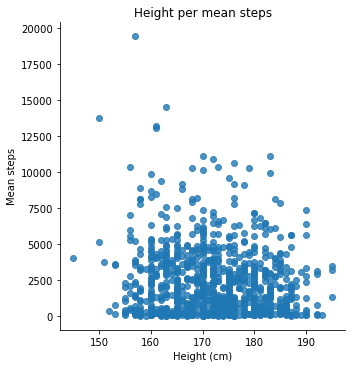

In [9]:
sns.lmplot(x='height', y='mean_steps', fit_reg=False, data=df_subset) #fit_reg=False leaves out the regression line; see below
plt.xlabel('Height (cm)') #use matplotlib to refine Seaborn plot
plt.ylabel('Mean steps')
plt.title('Height per mean steps')
plt.show()

This scatter plot shows that their are a couple of outliers and that most of the variable are centered between 0 and ±5000.

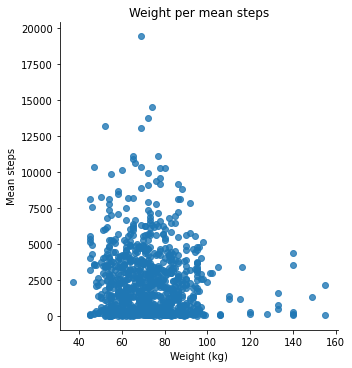

In [10]:
sns.lmplot(x='weight', y='mean_steps', fit_reg=False, data=df_subset) #fit_reg=False leaves out the regression line; see below
plt.xlabel('Weight (kg)') #use matplotlib to refine Seaborn plot
plt.ylabel('Mean steps')
plt.title('Weight per mean steps')
plt.show()

This scatter plot shows that their are a couple of outliers and that most of the variable are centered between 0 and ±5000 (mean)steps and between a weight of 40 - 100 kg.

### Pearson’s correlation for the 2 relations

To express the correlation between the three variables within the DataFram I used the .corr function and created a correlation table.


In [11]:
# print(pearsonr(df_subset['mean_steps'],df_subset['height']))
# print(pearsonr(df_subset['mean_steps'],df_subset['weight']))

corr = df_subset[['mean_steps', 'height', 'weight']].corr()
corr

,mean_steps,height,weight
mean_steps,1.00000,-0.075750,-0.085490
height,-0.07575,1.000000,0.510058
weight,-0.08549,0.510058,1.000000


### New DataFrame

With the columns: mean_steps and gender a new DataFrame is created to use as a 
starting point for graphs that show the correlation between mean steps per person and a qualitative variable. 

In [12]:
df_qualitative_variable = df[['mean_steps', 'gender']]

df_qualitative_variable 

,mean_steps,gender
0,5133.875000,Male
1,2826.371951,Male
2,3745.902439,Male
3,221.536585,Male
4,874.557927,Female
...,...,...
924,1742.908537,Female
925,731.689024,Male
926,6268.954268,Male
927,3872.115854,Female


Text(0.5, 1.0, 'Mean steps per gender')

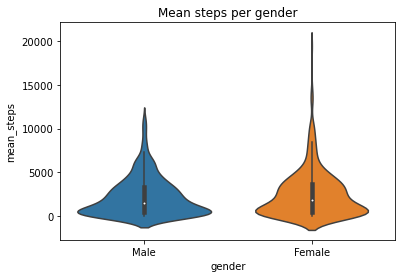

In [20]:
ax = sx = sns.violinplot(x="gender", y="mean_steps", data=df_qualitative_variable)
plt.title('Mean steps per gender')

I made a violin plot to show the division between gender and mean steps. 

This violin plot show that females have a higher mean of steps compared to male. 

Text(0.5, 1.0, 'Mean steps per gender')

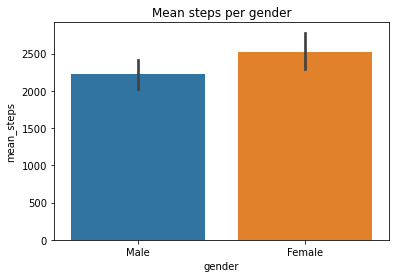

In [21]:
ax = sns.barplot(x="gender", y="mean_steps", data=df_qualitative_variable)
plt.title('Mean steps per gender')

To even further illustrate the division between gender and mean steps, I made an barchart. Again this show that the mean steps among females is higher. 



### New DataFrame

I created a new DataFrama with the columns: mean_steps, gender, education_1 to use as a 
starting point for graphs that visualize the relation between two qualitative variables. 

In [15]:
df_qualitative_variables = df[['mean_steps', 'gender', 'education_1']]


df_qualitative_variables 

,mean_steps,gender,education_1
0,5133.875000,Male,Master or doctorate
1,2826.371951,Male,Bachelor
2,3745.902439,Male,Master or doctorate
3,221.536585,Male,Bachelor
4,874.557927,Female,Bachelor
...,...,...,...
924,1742.908537,Female,Master or doctorate
925,731.689024,Male,Bachelor
926,6268.954268,Male,Bachelor
927,3872.115854,Female,High school


Text(0.5, 1.0, 'Mean steps per gender and education')

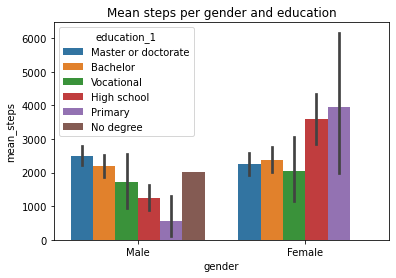

In [22]:
ax = sns.barplot(x="gender", y="mean_steps", hue="education_1", data=df_qualitative_variables)
plt.title('Mean steps per gender and education')

This graph shows the ratio of two categorical variables. In this case the gender and education per mean steps. 

Text(0.5, 1.0, 'Percentages of male to female per educational background')

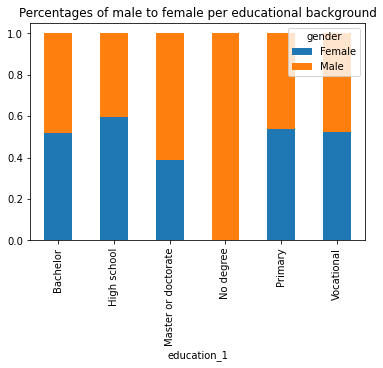

In [24]:
pd.crosstab(df_qualitative_variables.education_1, df_qualitative_variables.gender, normalize='index').plot.bar(stacked=True)
plt.title('Percentages of male to female per educational background')

### Cross table with relevant percentages

This crosstabel shows the percentages between the amount of females and males when it comes to educational background. 

It shows that most males have a Master of doctorate and most females a bachelor. 

In [19]:
df_percentage = pd.crosstab(df_qualitative_variables["gender"], df_qualitative_variables["education_1"])
df_percentage.astype('float').div(df_percentage.sum(axis=1), axis=0)

education_1,Bachelor,High school,Master or doctorate,No degree,Primary,Vocational
gender,,,,,,
Female,0.425287,0.144828,0.365517,0.000000,0.016092,0.048276
Male,0.348178,0.087045,0.512146,0.002024,0.012146,0.038462
